In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler

from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,classification_report,\
precision_score,roc_auc_score,matthews_corrcoef,precision_recall_fscore_support,make_scorer,\
accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,precision_recall_curve

from sklearn.model_selection import cross_validate,cross_val_score,RepeatedStratifiedKFold,KFold
from sklearn import model_selection

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import ADASYN
 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier,StackingClassifier,VotingClassifier

from matplotlib import pyplot

In [5]:
df=pd.read_excel("C:/Users/saich/OneDrive/Desktop/Diabetes_Classification.xlsx")

In [6]:
df.drop(labels="Patient number",axis=1,inplace=True)

In [7]:
df.replace({'Gender':{"female":"F","male":"M"}},inplace=True)

In [8]:
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Cholesterol        50.000
Glucose            26.750
HDL Chol           21.000
Chol/HDL ratio      2.200
Age                26.000
Gender              1.000
Height              6.000
Weight             49.750
BMI                 8.175
Systolic BP        26.000
Diastolic BP       15.000
waist               8.000
hip                 7.000
Waist/hip ratio     0.100
dtype: float64


In [10]:
df=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [11]:
target=df["Diabetes"]
features=df.drop(columns="Diabetes",axis=1)

In [12]:
ada = ADASYN(random_state=42,sampling_strategy="minority")
new_features, new_target = ada.fit_resample(features, target)

In [13]:
scaler = StandardScaler()
X_res=pd.DataFrame(scaler.fit_transform(new_features),columns=list(new_features.columns))
y_res=new_target

In [14]:
y_res.value_counts()

Diabetes       277
No diabetes    277
Name: Diabetes, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,Y_train1,Y_test1=train_test_split(X_res,
                                               y_res,
                                               test_size=0.35,
                                               random_state=42)

# Function to get scores(KFold cross validation)

In [16]:
def evaluate_model_accuracy(model, X, y):
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=kfold, n_jobs=-1)
    return scores


def evaluate_model_recall_positive(model,X,y):
    scoring = {'recall' : make_scorer(recall_score,pos_label="Diabetes") }
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    results =cross_validate(estimator=model,
                                    X=X,
                                    y=y,
                                    cv=kfold,
                                    scoring=scoring)
    return results["test_recall"]

def evaluate_model_recall_negative(model,X,y):
    scoring = {'recall' : make_scorer(recall_score,pos_label="No diabetes") }
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    results =cross_validate(estimator=model,
                                    X=X,
                                    y=y,
                                    cv=kfold,
                                    scoring=scoring)
    return results["test_recall"]

def evaluate_model_roc_auc(model, X, y):
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=kfold, n_jobs=-1)
    return scores

def evaluate_model_matthews_corrcoef(model,X,y):
    score=matthews_corrcoef(y,model.predict(X))
    return score

def evaluate_model_precision(model,X,y):
    scoring = {'precision' : make_scorer(recall_score,pos_label="Diabetes") }
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    results =cross_validate(estimator=model,
                                    X=X,
                                    y=y,
                                    cv=kfold,
                                    scoring=scoring)
    return results["test_precision"]

def evaluate_model_f1score(model,X,y):
    scoring = {'f1' : make_scorer(recall_score,pos_label="Diabetes") }
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    results =cross_validate(estimator=model,
                                    X=X,
                                    y=y,
                                    cv=kfold,
                                    scoring=scoring)
    return results["test_f1"]


# Logistic Regression

In [17]:
LR=LogisticRegression(C=0.03359818286283781,penalty="l2",solver= 'liblinear',random_state=42)

LR.fit(X_train1,Y_train1)

LogisticRegression(C=0.03359818286283781, random_state=42, solver='liblinear')

In [18]:
print(classification_report(Y_test1,LR.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.88      0.92      0.90        96
 No diabetes       0.91      0.88      0.90        98

    accuracy                           0.90       194
   macro avg       0.90      0.90      0.90       194
weighted avg       0.90      0.90      0.90       194



In [19]:
cv = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
scoring = {'recall' : make_scorer(recall_score,pos_label="Diabetes") }

In [20]:
# for recall
results1 =cross_validate(estimator=LR,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring=scoring)
# for accuracy
accuracy1 = model_selection.cross_val_score(LR, X_test1,Y_test1, scoring='accuracy', cv=cv, n_jobs=-1)

In [21]:
print("Accuracy",np.mean(accuracy1))
print("recall score is :",np.mean(results1["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(LR, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("score time is :",np.mean(results1["score_time"]))
print("fit time is :",np.mean(results1["fit_time"]))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=LR,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))
print("matthews_corrcoef is: ",matthews_corrcoef(Y_test1,LR.predict(X_test1)))

Accuracy 0.8868421052631579
recall score is : 0.9058658008658009
roc-auc score is 0.9233404928404928
score time is : 0.0018573284149169921
fit time is : 0.0029482126235961916
recall score for No diabetes is : 0.8478021978021978
matthews_corrcoef is:  0.7945555801711949


# Grid Search

In [22]:
# param_grid = [
#     {
#      'penalty' : ['l1', 'l2'],
#     'C' : np.logspace(-4, 4, 20),
#     'solver' : ['liblinear']}
# ]

# # param_grid = [
# #     {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30]}
# # ]

# # param_grid = dict(n_neighbors=list(range(10, 31)))

# param_grid = [
#      {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30]}
#  ]
    

# # # # grid = RandomizedSearchCV(knn, param_distributions = param_grid, cv = 10,n_jobs=-1)
# grid=GridSearchCV(LR,param_grid,cv=5,n_jobs=-1)

# grid.fit(X_train1,Y_train1)



In [23]:
# grid.best_params_

# Decsison Trees

In [24]:
classifier1=DecisionTreeClassifier(criterion="entropy",max_depth=15,random_state=42)

In [25]:
classifier1.fit(X_train1,Y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=42)

In [26]:
print(classification_report(Y_test1,classifier1.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.90      0.97      0.93        96
 No diabetes       0.97      0.90      0.93        98

    accuracy                           0.93       194
   macro avg       0.93      0.93      0.93       194
weighted avg       0.94      0.93      0.93       194



In [27]:
results2 =cross_validate(estimator=classifier1,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="Diabetes") })

accuracy2 = model_selection.cross_val_score(classifier1, X_test1,Y_test1, scoring='accuracy', cv=cv, n_jobs=-1)

In [28]:
print("Accuracy",np.mean(accuracy2))
print("recall score is :",np.mean(results1["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(classifier1, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("score time is :",np.mean(results1["score_time"]))
print("fit time is :",np.mean(results1["fit_time"]))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=classifier1,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=model_selection.KFold(n_splits=10),
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))
print("matthews_corrcoef is: ",matthews_corrcoef(Y_test1,classifier1.predict(X_test1)))

Accuracy 0.8768421052631579
recall score is : 0.9058658008658009
roc-auc score is 0.8708431845931847
score time is : 0.0018573284149169921
fit time is : 0.0029482126235961916
recall score for No diabetes is : 0.8565262515262514
matthews_corrcoef is:  0.868325878202263


# KNN

In [29]:
knn= KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train1, Y_train1) 

KNeighborsClassifier(n_neighbors=11)

In [30]:
print(classification_report(Y_test1,knn.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.81      1.00      0.89        96
 No diabetes       1.00      0.77      0.87        98

    accuracy                           0.88       194
   macro avg       0.90      0.88      0.88       194
weighted avg       0.90      0.88      0.88       194



In [31]:
results3 =cross_validate(estimator=knn,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="Diabetes") })

accuracy3 = model_selection.cross_val_score(knn, X_test1,Y_test1, scoring='accuracy', cv=cv, n_jobs=-1)

In [32]:
print("Accuracy",np.mean(accuracy3))
print("recall score for Diabetes is :",np.mean(results3["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(knn, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("score time is :",np.mean(results3["score_time"]))
print("fit time is :",np.mean(results3["fit_time"]))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=knn,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))
print("matthews_corrcoef is: ",matthews_corrcoef(Y_test1,knn.predict(X_test1)))

Accuracy 0.8707894736842106
recall score for Diabetes is : 0.9642424242424242
roc-auc score is 0.9483601398601398
score time is : 0.0034006595611572265
fit time is : 0.0032660722732543944
recall score for No diabetes is : 0.7618919968919969
matthews_corrcoef is:  0.785741568881324


# Naive bayes

In [33]:
nb = GaussianNB()
nb.fit(X_train1, Y_train1)

GaussianNB()

In [34]:
print(classification_report(Y_test1,nb.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.87      0.85      0.86        96
 No diabetes       0.86      0.88      0.87        98

    accuracy                           0.87       194
   macro avg       0.87      0.87      0.87       194
weighted avg       0.87      0.87      0.87       194



In [35]:
results4 =cross_validate(estimator=nb,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="Diabetes") })

accuracy4 = model_selection.cross_val_score(nb, X_test1,Y_test1, scoring='accuracy', cv=cv, n_jobs=-1)

In [36]:
print("Accuracy",np.mean(accuracy4))
print("recall score is :",np.mean(results4["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(nb, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("score time is :",np.mean(results4["score_time"]))
print("fit time is :",np.mean(results4["fit_time"]))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=nb,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=model_selection.KFold(n_splits=10),
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))
print("matthews_corrcoef is: ",matthews_corrcoef(Y_test1,nb.predict(X_test1)))

Accuracy 0.8760526315789473
recall score is : 0.8473701298701298
roc-auc score is 0.9374470529470529
score time is : 0.001562809944152832
fit time is : 0.001561450958251953
recall score for No diabetes is : 0.8878296703296703
matthews_corrcoef is:  0.7320289900827764


# SVM

In [37]:
svm = SVC(kernel='rbf',probability=True)
svm.fit(X_train1, Y_train1)

SVC(probability=True)

In [38]:
print(classification_report(Y_test1,svm.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.92      1.00      0.96        96
 No diabetes       1.00      0.92      0.96        98

    accuracy                           0.96       194
   macro avg       0.96      0.96      0.96       194
weighted avg       0.96      0.96      0.96       194



In [39]:
results5 =cross_validate(estimator=svm,
                                    X=X_train1,
                                    y=Y_train1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="Diabetes") })

accuracy5 = model_selection.cross_val_score(svm, X_train1,Y_train1, scoring='accuracy', cv=cv, n_jobs=-1)

In [40]:
print("Accuracy",np.mean(accuracy5))
print("recall score is :",np.mean(results5["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(svm, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("score time is :",np.mean(results5["score_time"]))
print("fit time is :",np.mean(results5["fit_time"]))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=svm,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))
print("matthews_corrcoef is: ",matthews_corrcoef(Y_test1,svm.predict(X_test1)))

Accuracy 0.95
recall score is : 0.984572192513369
roc-auc score is 0.976922077922078
score time is : 0.0018645763397216798
fit time is : 0.021032047271728516
recall score for No diabetes is : 0.9114468864468865
matthews_corrcoef is:  0.9207191237649851


# Random Forests

In [41]:
rf=RandomForestClassifier(oob_score=True,n_estimators=250)
rf.fit(X_train1, Y_train1)

RandomForestClassifier(n_estimators=250, oob_score=True)

In [42]:
print(classification_report(Y_test1,rf.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.96      0.99      0.97        96
 No diabetes       0.99      0.96      0.97        98

    accuracy                           0.97       194
   macro avg       0.97      0.97      0.97       194
weighted avg       0.97      0.97      0.97       194



In [43]:
results6 =cross_validate(estimator=rf,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="Diabetes") })

accuracy6 = model_selection.cross_val_score(rf, X_test1,Y_test1, scoring='accuracy', cv=cv, n_jobs=-1)

In [44]:
print("Accuracy",np.mean(accuracy6))
print("recall score is :",np.mean(results6["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(rf, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("score time is :",np.mean(results6["score_time"]))
print("fit time is :",np.mean(results6["fit_time"]))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=rf,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=model_selection.KFold(n_splits=10),
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))
print("matthews_corrcoef is: ",matthews_corrcoef(Y_test1,rf.predict(X_test1)))

Accuracy 0.9636842105263158
recall score is : 0.9608333333333334
roc-auc score is 0.9931235431235432
score time is : 0.02165384292602539
fit time is : 0.37974226474761963
recall score for No diabetes is : 0.9722222222222221
matthews_corrcoef is:  0.9489183132396615


In [45]:
def get_models():
    models = dict()
    n_trees = [10, 50, 100,250, 500,750]
    for n in n_trees:
        models[str(n)] = RandomForestClassifier(n_estimators=n,random_state=42)
    return models

In [46]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_recall_positive(model, X_test1,Y_test1)
    results.append(scores)
    names.append(name)
    print('>%s %.3f ' % (name, np.mean(scores)))

>10 0.973 
>50 0.961 
>100 0.961 
>250 0.961 
>500 0.961 
>750 0.961 


# Ensembel

In [96]:
model1= VotingClassifier(estimators=[ ('dt', classifier1),('knn',knn),('svm',svm),('LR',LR)], voting='soft')
model1.fit(X_train1,Y_train1)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=15,
                                                     random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=11)),
                             ('svm', SVC(probability=True)),
                             ('LR',
                              LogisticRegression(C=0.03359818286283781,
                                                 random_state=42,
                                                 solver='liblinear'))],
                 voting='soft')

In [97]:
print(classification_report(Y_test1,model1.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.92      1.00      0.96        96
 No diabetes       1.00      0.92      0.96        98

    accuracy                           0.96       194
   macro avg       0.96      0.96      0.96       194
weighted avg       0.96      0.96      0.96       194



In [98]:
results =cross_validate(estimator=model1,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring=scoring)
accuracy = model_selection.cross_val_score(LR, X_test1,Y_test1, scoring='accuracy', cv=cv, n_jobs=-1)

In [99]:
print("Accuracy",np.mean(accuracy))
print("recall score is :",np.mean(results["test_recall"]))
print("score time is :",np.mean(results["score_time"]))
print("fit time is :",np.mean(results["fit_time"]))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=model1,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))
print("matthews_corrcoef is: ",matthews_corrcoef(Y_test1,model1.predict(X_test1)))

Accuracy 0.8868421052631579
recall score is : 0.9301515151515151
score time is : 0.007517194747924805
fit time is : 0.016763591766357423
recall score for No diabetes is : 0.8808913308913308
matthews_corrcoef is:  0.9207191237649851


# Ensemble of random forests classifiers.

In [51]:
logbagClf = BaggingClassifier(rf, n_estimators = 5)
logbagClf.fit(X_train1, Y_train1)

BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=250,
                                                        oob_score=True),
                  n_estimators=5)

In [52]:
print(classification_report(Y_test1,logbagClf.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.96      0.99      0.97        96
 No diabetes       0.99      0.96      0.97        98

    accuracy                           0.97       194
   macro avg       0.97      0.97      0.97       194
weighted avg       0.97      0.97      0.97       194



In [53]:
accuracy7=model_selection.cross_val_score(logbagClf, X_test1,Y_test1, scoring='accuracy', cv=cv, n_jobs=-1)

In [54]:
print("accuracy score is",np.mean(accuracy7))
print("recall score is :",np.mean(cross_validate(estimator=logbagClf,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring=scoring)["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(logbagClf, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=logbagClf,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))
print("matthews_corrcoef is: ",matthews_corrcoef(Y_test1,logbagClf.predict(X_test1)))

accuracy score is 0.958421052631579
recall score is : 0.9350757575757577
roc-auc score is 0.9905594405594407
recall score for No diabetes is : 0.9383394383394383
matthews_corrcoef is:  0.9489183132396615


In [55]:
# recall_score(Y_test1, model1.predict(X_test1), pos_label="Diabetes")

# Ensemble of logistic regression classifiers.

In [56]:
bag_LR = BaggingClassifier(LR, n_estimators = 10,random_state=42)
bag_LR.fit(X_train1, Y_train1)

BaggingClassifier(base_estimator=LogisticRegression(C=0.03359818286283781,
                                                    random_state=42,
                                                    solver='liblinear'),
                  random_state=42)

In [57]:
print(classification_report(Y_test1,bag_LR.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.88      0.91      0.89        96
 No diabetes       0.91      0.88      0.89        98

    accuracy                           0.89       194
   macro avg       0.89      0.89      0.89       194
weighted avg       0.89      0.89      0.89       194



In [58]:
print("Accuracy is",np.mean( model_selection.cross_val_score(bag_LR, X_test1,Y_test1, scoring='accuracy', cv=cv, n_jobs=-1)))
print("recall score is :",np.mean(cross_validate(estimator=bag_LR,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring=scoring)["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(bag_LR, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=bag_LR,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))
print("matthews_corrcoef is: ",matthews_corrcoef(Y_test1,bag_LR.predict(X_test1)))

Accuracy is 0.881578947368421
recall score is : 0.9058658008658009
roc-auc score is 0.9221527916527916
recall score for No diabetes is : 0.8335164835164836
matthews_corrcoef is:  0.7839260185782281


In [59]:
print("accuracy is: ",np.mean(evaluate_model_accuracy(model1,X_res,y_res)))
print("diabetes recall is: ",np.mean(evaluate_model_recall_positive(model1,X_res,y_res)))
print("no diabetes recall is: ",np.mean(evaluate_model_recall_negative(model1,X_res,y_res)))
print("roc_auc is: ",np.mean(evaluate_model_roc_auc(model1,X_res,y_res)))
print("matthews_corrcoef is: ",evaluate_model_matthews_corrcoef(model1,X_res,y_res))

accuracy is:  0.9440259740259741
diabetes recall is:  0.9701706569292776
no diabetes recall is:  0.915244630848079
roc_auc is:  0.9924185253361543
matthews_corrcoef is:  0.928985113255556


# AdaBoost

In [60]:
Adaboost = AdaBoostClassifier(random_state=42,n_estimators=250)
Adaboost.fit(X_train1, Y_train1)

AdaBoostClassifier(n_estimators=250, random_state=42)

In [61]:
print("accuracy is: ",np.mean(evaluate_model_accuracy(Adaboost,X_test1,Y_test1)))
print("diabetes recall is: ",np.mean(evaluate_model_recall_positive(Adaboost,X_test1,Y_test1)))
print("no diabetes recall is: ",np.mean(evaluate_model_recall_negative(Adaboost,X_test1,Y_test1)))
print("roc_auc is: ",np.mean(evaluate_model_roc_auc(Adaboost,X_test1,Y_test1)))
print("matthews_corrcoef is: ",evaluate_model_matthews_corrcoef(Adaboost,X_test1,Y_test1))

accuracy is:  0.953421052631579
diabetes recall is:  0.99
no diabetes recall is:  0.9152625152625152
roc_auc is:  0.975989676989677
matthews_corrcoef is:  0.8878253982502649


In [62]:
def get_models():
    models = dict()
    n_trees = [10, 50, 100,250, 500, 1000]
    for n in n_trees:
        models[str(n)] = AdaBoostClassifier(n_estimators=n)
    return models

In [63]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_recall_positive(model, X_test1,Y_test1)
    results.append(scores)
    names.append(name)
    print('>%s %.3f ' % (name, np.mean(scores)))

>10 0.903 
>50 0.964 
>100 0.973 
>250 0.990 
>500 0.964 
>1000 0.964 


# Gradient Boosting

In [64]:
Gboost= GradientBoostingClassifier(n_estimators=250,learning_rate=0.9,random_state=42)
Gboost.fit(X_train1, Y_train1)

GradientBoostingClassifier(learning_rate=0.9, n_estimators=250, random_state=42)

In [65]:
print("accuracy is: ",np.mean(evaluate_model_accuracy(Gboost,X_test1,Y_test1)))
print("diabetes recall is: ",np.mean(evaluate_model_recall_positive(Gboost,X_test1,Y_test1)))
print("no diabetes recall is: ",np.mean(evaluate_model_recall_negative(Gboost,X_test1,Y_test1)))
print("roc_auc is: ",np.mean(evaluate_model_roc_auc(Gboost,X_test1,Y_test1)))
print("matthews_corrcoef is: ",evaluate_model_matthews_corrcoef(Gboost,X_test1,Y_test1))
print("precision is: ",np.mean(evaluate_model_precision(Gboost,X_test1,Y_test1)))

accuracy is:  0.9581578947368421
diabetes recall is:  0.9833333333333334
no diabetes recall is:  0.9223137973137974
roc_auc is:  0.986052836052836
matthews_corrcoef is:  0.9303035163079433
precision is:  0.9833333333333334


In [66]:
def get_models():
    models = dict()
    n_trees = [10,30, 50, 100,250, 500, 1000]
    for n in n_trees:
        models[str(n)] = GradientBoostingClassifier(n_estimators=n)
    return models

In [67]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_recall_positive(model, X_test1,Y_test1)
    results.append(scores)
    names.append(name)
    print('>%s %.3f ' % (name, np.mean(scores)))

>10 0.899 
>30 0.934 
>50 0.953 
>100 0.962 
>250 0.983 
>500 0.971 
>1000 0.971 


# ExtraTreesClassifier

In [68]:
etc = ExtraTreesClassifier(n_estimators=30)
etc.fit(X_train1,Y_train1)

ExtraTreesClassifier(n_estimators=30)

In [69]:
print("accuracy is: ",np.mean(evaluate_model_accuracy(etc,X_test1,Y_test1)))
print("diabetes recall is: ",np.mean(evaluate_model_recall_positive(etc,X_test1,Y_test1)))
print("no diabetes recall is: ",np.mean(evaluate_model_recall_negative(etc,X_test1,Y_test1)))
print("roc_auc is: ",np.mean(evaluate_model_roc_auc(etc,X_test1,Y_test1)))
print("matthews_corrcoef is: ",evaluate_model_matthews_corrcoef(etc,X_test1,Y_test1))
print("precision is: ",np.mean(evaluate_model_precision(etc,X_test1,Y_test1)))

accuracy is:  0.9634210526315791
diabetes recall is:  0.9690476190476189
no diabetes recall is:  0.9592185592185591
roc_auc is:  0.9875874125874127
matthews_corrcoef is:  0.9695423500723407
precision is:  0.956547619047619


In [70]:
def get_models():
    models = dict()
    n_trees = [10,30, 50, 100,250, 500, 1000]
    for n in n_trees:
        models[str(n)] = ExtraTreesClassifier(n_estimators=n)
    return models

In [71]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_recall_positive(model, X_test1,Y_test1)
    results.append(scores)
    names.append(name)
    print('>%s %.3f ' % (name, np.mean(scores)))

>10 0.957 
>30 0.969 
>50 0.969 
>100 0.969 
>250 0.969 
>500 0.957 
>1000 0.957 


# Ensemble of Adaboost,Gboost,Etc

In [72]:
model2=VotingClassifier(estimators=[ ('Adaboost', Adaboost),('Gboost',Gboost),('etc',etc)], voting='soft')
model2.fit(X_train1,Y_train1)

VotingClassifier(estimators=[('Adaboost',
                              AdaBoostClassifier(n_estimators=250,
                                                 random_state=42)),
                             ('Gboost',
                              GradientBoostingClassifier(learning_rate=0.9,
                                                         n_estimators=250,
                                                         random_state=42)),
                             ('etc', ExtraTreesClassifier(n_estimators=30))],
                 voting='soft')

# Ensemble of Adaboost,Gboost,knn

In [73]:
model3=VotingClassifier(estimators=[ ('knn', Adaboost),('LR',knn),('rf',Gboost)], voting='soft')
model3.fit(X_train1,Y_train1)

VotingClassifier(estimators=[('knn',
                              AdaBoostClassifier(n_estimators=250,
                                                 random_state=42)),
                             ('LR', KNeighborsClassifier(n_neighbors=11)),
                             ('rf',
                              GradientBoostingClassifier(learning_rate=0.9,
                                                         n_estimators=250,
                                                         random_state=42))],
                 voting='soft')

# Ensemble of Adaboost,Gboost,rf

In [74]:
model4=VotingClassifier(estimators=[ ('Adaboost', Adaboost),('Gboost',Gboost),('rf',rf)], voting='soft')
model4.fit(X_train1,Y_train1)

VotingClassifier(estimators=[('Adaboost',
                              AdaBoostClassifier(n_estimators=250,
                                                 random_state=42)),
                             ('Gboost',
                              GradientBoostingClassifier(learning_rate=0.9,
                                                         n_estimators=250,
                                                         random_state=42)),
                             ('rf',
                              RandomForestClassifier(n_estimators=250,
                                                     oob_score=True))],
                 voting='soft')

# Ensemble of Adaboost,Gboost

In [75]:
model5=VotingClassifier(estimators=[ ('Adaboost', Adaboost),('Gboost',Gboost)], voting='soft')
model5.fit(X_train1,Y_train1)

VotingClassifier(estimators=[('Adaboost',
                              AdaBoostClassifier(n_estimators=250,
                                                 random_state=42)),
                             ('Gboost',
                              GradientBoostingClassifier(learning_rate=0.9,
                                                         n_estimators=250,
                                                         random_state=42))],
                 voting='soft')

# Ensemble of classifier1,knn,svm

In [76]:
model6=VotingClassifier(estimators=[ ('dt', classifier1),('knn',knn),('svm',svm),('LR',LR)], voting='soft')
model6.fit(X_train1,Y_train1)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=15,
                                                     random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=11)),
                             ('svm', SVC(probability=True)),
                             ('LR',
                              LogisticRegression(C=0.03359818286283781,
                                                 random_state=42,
                                                 solver='liblinear'))],
                 voting='soft')

# Confusion Matrix

In [77]:
def conf_matrix(y_true,x_true,model):
    ax= plt.subplot()
    sns.heatmap(confusion_matrix(y_true, model.predict(x_true)), annot=True)
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Diabetes', 'No Diabetes']); ax.yaxis.set_ticklabels(['Diabetes', 'No Diabetes']);
    return ax

# testing scores

In [78]:
print("accuracy is: ",np.mean(evaluate_model_accuracy(rf,X_test1,Y_test1)))
print("diabetes recall is: ",np.mean(evaluate_model_recall_positive(rf,X_test1,Y_test1)))
print("no diabetes recall is: ",np.mean(evaluate_model_recall_negative(rf,X_test1,Y_test1)))
print("roc_auc is: ",np.mean(evaluate_model_roc_auc(rf,X_test1,Y_test1)))
print("matthews_corrcoef is: ",evaluate_model_matthews_corrcoef(rf,X_test1,Y_test1))
print("precision is: ",np.mean(evaluate_model_precision(rf,X_test1,Y_test1)))

accuracy is:  0.9689473684210526
diabetes recall is:  0.9733333333333334
no diabetes recall is:  0.9669108669108668
roc_auc is:  0.9931235431235432
matthews_corrcoef is:  0.9489183132396615
precision is:  0.9608333333333334


In [79]:
print("accuracy is: ",np.mean(evaluate_model_accuracy(Gboost,X_test1,Y_test1)))
print("diabetes recall is: ",np.mean(evaluate_model_recall_positive(Gboost,X_test1,Y_test1)))
print("no diabetes recall is: ",np.mean(evaluate_model_recall_negative(Gboost,X_test1,Y_test1)))
print("roc_auc is: ",np.mean(evaluate_model_roc_auc(Gboost,X_test1,Y_test1)))
print("matthews_corrcoef is: ",evaluate_model_matthews_corrcoef(Gboost,X_test1,Y_test1))
print("precision is: ",np.mean(evaluate_model_precision(Gboost,X_test1,Y_test1)))

accuracy is:  0.9581578947368421
diabetes recall is:  0.9833333333333334
no diabetes recall is:  0.9223137973137974
roc_auc is:  0.986052836052836
matthews_corrcoef is:  0.9303035163079433
precision is:  0.9833333333333334


In [80]:
print("accuracy is: ",np.mean(evaluate_model_accuracy(etc,X_test1,Y_test1)))
print("diabetes recall is: ",np.mean(evaluate_model_recall_positive(etc,X_test1,Y_test1)))
print("no diabetes recall is: ",np.mean(evaluate_model_recall_negative(etc,X_test1,Y_test1)))
print("roc_auc is: ",np.mean(evaluate_model_roc_auc(etc,X_test1,Y_test1)))
print("matthews_corrcoef is: ",evaluate_model_matthews_corrcoef(etc,X_test1,Y_test1))
print("precision is: ",np.mean(evaluate_model_precision(etc,X_test1,Y_test1)))

accuracy is:  0.958421052631579
diabetes recall is:  0.9482142857142858
no diabetes recall is:  0.961996336996337
roc_auc is:  0.9948717948717949
matthews_corrcoef is:  0.9695423500723407
precision is:  0.956547619047619


# showing Confuction Matrix

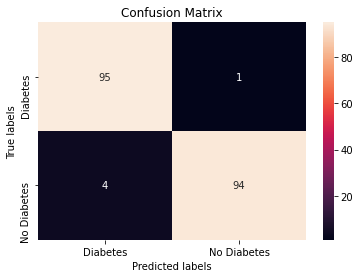

In [81]:
conf_matrix(Y_test1,X_test1,rf)
plt.show()

In [82]:
Y_test1.value_counts()

No diabetes    98
Diabetes       96
Name: Diabetes, dtype: int64

# plotting roc-auc curve

In [83]:
import sklearn.metrics as metrics
def roc_auc_curve(model,x,y):
    probs = model.predict_proba(x)
    preds = probs[:,0]
    fpr, tpr, threshold = metrics.roc_curve(y, preds,pos_label="Diabetes")
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC =%0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return plt.show()



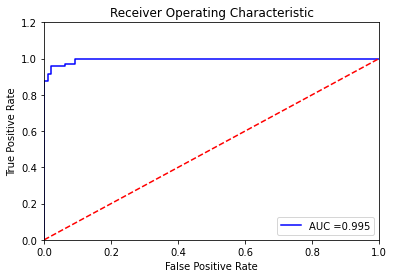

In [84]:
roc_auc_curve(model1,X_test1,Y_test1)

# All Scores

In [85]:
scores_df=pd.DataFrame()

LR_scores={'accuracy': [0.8868421052631579],
 'recall_positive': [0.9058658008658009],

 'roc_auc': [0.9233404928404928],
 'precision': [0.9058658008658009],
 "f1_score":[0.9058658008658009]}

scores_df=pd.DataFrame(LR_scores,index=["LR"])

scores_df.loc["knn"] = [np.mean(evaluate_model_accuracy(knn,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(knn,X_test1,Y_test1)),
               
                       np.mean(evaluate_model_roc_auc(knn,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(knn,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(knn,X_test1,Y_test1))]


scores_df.loc["classifier1"] = [np.mean(evaluate_model_accuracy(classifier1,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(classifier1,X_test1,Y_test1)),
                 
                       np.mean(evaluate_model_roc_auc(classifier1,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(classifier1,X_test1,Y_test1)),
                               np.mean(evaluate_model_f1score(classifier1,X_test1,Y_test1))]

scores_df.loc["svm"] = [np.mean(evaluate_model_accuracy(svm,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(svm,X_test1,Y_test1)),
              
                       np.mean(evaluate_model_roc_auc(svm,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(svm,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(svm,X_test1,Y_test1))]

scores_df.loc["nb"] = [np.mean(evaluate_model_accuracy(nb,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(nb,X_test1,Y_test1)),
                  
                       np.mean(evaluate_model_roc_auc(nb,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(nb,X_test1,Y_test1)),
                      np.mean(evaluate_model_f1score(nb,X_test1,Y_test1))]

scores_df.loc["rf"] = [np.mean(evaluate_model_accuracy(rf,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(rf,X_test1,Y_test1)),
                
                       np.mean(evaluate_model_roc_auc(rf,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(rf,X_test1,Y_test1)),
                      np.mean(evaluate_model_f1score(rf,X_test1,Y_test1))]

scores_df.loc["Gboost"] = [np.mean(evaluate_model_accuracy(Gboost,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(Gboost,X_test1,Y_test1)),
              
                       np.mean(evaluate_model_roc_auc(Gboost,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(Gboost,X_test1,Y_test1)),
                          np.mean(evaluate_model_f1score(Gboost,X_test1,Y_test1))]

scores_df.loc["Adaboost"] = [np.mean(evaluate_model_accuracy(Adaboost,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(Adaboost,X_test1,Y_test1)),
                  
                       np.mean(evaluate_model_roc_auc(Adaboost,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(Adaboost,X_test1,Y_test1)),
                            np.mean(evaluate_model_f1score(Adaboost,X_test1,Y_test1))]

scores_df.loc["etc"] = [np.mean(evaluate_model_accuracy(etc,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(etc,X_test1,Y_test1)),
                     
                       np.mean(evaluate_model_roc_auc(etc,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(etc,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(etc,X_test1,Y_test1))]

scores_df.loc["model1"] = [np.mean(evaluate_model_accuracy(model1,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(model1,X_test1,Y_test1)),
                     
                       np.mean(evaluate_model_roc_auc(model1,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(model1,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(model1,X_test1,Y_test1))]

scores_df.loc["model2"] = [np.mean(evaluate_model_accuracy(model2,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(model2,X_test1,Y_test1)),
                    
                       np.mean(evaluate_model_roc_auc(model2,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(model2,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(model2,X_test1,Y_test1))]

scores_df.loc["model3"]=[np.mean(evaluate_model_accuracy(model3,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(model3,X_test1,Y_test1)),
                    
                       np.mean(evaluate_model_roc_auc(model3,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(model3,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(model3,X_test1,Y_test1))]

scores_df.loc["model4"]=[np.mean(evaluate_model_accuracy(model4,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(model4,X_test1,Y_test1)),
                    
                       np.mean(evaluate_model_roc_auc(model4,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(model4,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(model4,X_test1,Y_test1))]

scores_df.loc["model5"]=[np.mean(evaluate_model_accuracy(model5,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(model5,X_test1,Y_test1)),
                    
                       np.mean(evaluate_model_roc_auc(model5,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(model5,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(model5,X_test1,Y_test1))]


scores_df.loc["model6"]=[np.mean(evaluate_model_accuracy(model6,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(model6,X_test1,Y_test1)),
                    
                       np.mean(evaluate_model_roc_auc(model6,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(model6,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(model6,X_test1,Y_test1))]

In [86]:
scores_df["total_scores"] = scores_df.sum(axis=1)

In [87]:
scores_df.sort_values(by="recall_positive",ascending=False)

,accuracy,recall_positive,roc_auc,precision,f1_score,total_scores
Adaboost,0.953421,0.990000,0.975990,0.990000,0.990000,4.899411
Gboost,0.958158,0.983333,0.986053,0.983333,0.983333,4.894211
model2,0.958158,0.983333,0.991570,0.983333,0.983333,4.899727
model3,0.958158,0.983333,0.985251,0.983333,0.983333,4.893409
model4,0.958158,0.983333,0.991841,0.983333,0.983333,4.899999
model5,0.958158,0.983333,0.978089,0.983333,0.983333,4.886246
knn,0.870789,0.964242,0.948360,0.964242,0.964242,4.711877
rf,0.963947,0.960833,0.991841,0.960833,0.964242,4.841698
etc,0.963421,0.956548,0.995513,0.969048,0.956548,4.841077
model6,0.917368,0.942652,0.976748,0.942652,0.942652,4.722071


# Individual model scores

In [88]:
individual_scores=pd.DataFrame()

LR_scores={'accuracy': [0.8868421052631579],
 'recall_positive': [0.9058658008658009],

 'roc_auc': [0.9233404928404928],
 'precision': [0.9058658008658009],
 "f1_score":[0.9058658008658009]}

individual_scores=pd.DataFrame(LR_scores,index=["LR"])

individual_scores.loc["knn"] = [np.mean(evaluate_model_accuracy(knn,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(knn,X_test1,Y_test1)),
               
                       np.mean(evaluate_model_roc_auc(knn,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(knn,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(knn,X_test1,Y_test1))]


individual_scores.loc["classifier1"] = [np.mean(evaluate_model_accuracy(classifier1,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(classifier1,X_test1,Y_test1)),
                 
                       np.mean(evaluate_model_roc_auc(classifier1,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(classifier1,X_test1,Y_test1)),
                               np.mean(evaluate_model_f1score(classifier1,X_test1,Y_test1))]

individual_scores.loc["svm"] = [np.mean(evaluate_model_accuracy(svm,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(svm,X_test1,Y_test1)),
              
                       np.mean(evaluate_model_roc_auc(svm,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(svm,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(svm,X_test1,Y_test1))]

individual_scores.loc["nb"] = [np.mean(evaluate_model_accuracy(nb,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(nb,X_test1,Y_test1)),
                  
                       np.mean(evaluate_model_roc_auc(nb,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(nb,X_test1,Y_test1)),
                      np.mean(evaluate_model_f1score(nb,X_test1,Y_test1))]

In [89]:
individual_scores

,accuracy,recall_positive,roc_auc,precision,f1_score
LR,0.886842,0.905866,0.923340,0.905866,0.905866
knn,0.870789,0.964242,0.948360,0.964242,0.964242
classifier1,0.876842,0.881894,0.870843,0.881894,0.881894
svm,0.922632,0.918366,0.976922,0.918366,0.918366
nb,0.876053,0.847370,0.937447,0.847370,0.847370


# Ensemble Models Scores

In [90]:
Ensemble_scores=pd.DataFrame()

rf_scores={'accuracy': [0.9689473684210526],
 'recall_positive': [0.9517424242424243],

 'roc_auc': [0.9931235431235432],
 'precision': [0.9608333333333334],
 "f1_score":[0.9608333333333334]}

Ensemble_scores=pd.DataFrame(rf_scores,index=["rf"])


Ensemble_scores.loc["Gboost"] = [np.mean(evaluate_model_accuracy(Gboost,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(Gboost,X_test1,Y_test1)),
              
                       np.mean(evaluate_model_roc_auc(Gboost,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(Gboost,X_test1,Y_test1)),
                          np.mean(evaluate_model_f1score(Gboost,X_test1,Y_test1))]

Ensemble_scores.loc["Adaboost"] = [np.mean(evaluate_model_accuracy(Adaboost,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(Adaboost,X_test1,Y_test1)),
                  
                       np.mean(evaluate_model_roc_auc(Adaboost,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(Adaboost,X_test1,Y_test1)),
                            np.mean(evaluate_model_f1score(Adaboost,X_test1,Y_test1))]

Ensemble_scores.loc["etc"] = [np.mean(evaluate_model_accuracy(etc,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(etc,X_test1,Y_test1)),
                     
                       np.mean(evaluate_model_roc_auc(etc,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(etc,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(etc,X_test1,Y_test1))]

In [91]:
Ensemble_scores

,accuracy,recall_positive,roc_auc,precision,f1_score
rf,0.968947,0.951742,0.993124,0.960833,0.960833
Gboost,0.958158,0.983333,0.986053,0.983333,0.983333
Adaboost,0.953421,0.990000,0.975990,0.990000,0.990000
etc,0.968947,0.983333,0.994414,0.959048,0.956548


# Custom Ensemble Models

In [100]:
custom_custom_ensemble_scores=pd.DataFrame()

model1_scores={'accuracy': [0.9021052631578949],
 'recall_positive': [ 0.9058658008658009],

 'roc_auc': [0.9726289266289267],
 'precision': [0.9058658008658009],
 "f1_score":[ 0.9058658008658009]}

custom_ensemble_scores=pd.DataFrame(model1_scores,index=["model1"])


custom_ensemble_scores.loc["model2"] = [np.mean(evaluate_model_accuracy(model2,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(model2,X_test1,Y_test1)),
                    
                       np.mean(evaluate_model_roc_auc(model2,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(model2,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(model2,X_test1,Y_test1))]

custom_ensemble_scores.loc["model3"]=[np.mean(evaluate_model_accuracy(model3,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(model3,X_test1,Y_test1)),
                    
                       np.mean(evaluate_model_roc_auc(model3,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(model3,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(model3,X_test1,Y_test1))]

custom_ensemble_scores.loc["model4"]=[np.mean(evaluate_model_accuracy(model4,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(model4,X_test1,Y_test1)),
                    
                       np.mean(evaluate_model_roc_auc(model4,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(model4,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(model4,X_test1,Y_test1))]

custom_ensemble_scores.loc["model5"]=[np.mean(evaluate_model_accuracy(model5,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(model5,X_test1,Y_test1)),
                    
                       np.mean(evaluate_model_roc_auc(model5,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(model5,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(model5,X_test1,Y_test1))]


custom_ensemble_scores.loc["model6"]=[np.mean(evaluate_model_accuracy(model6,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(model6,X_test1,Y_test1)),
                    
                       np.mean(evaluate_model_roc_auc(model6,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(model6,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(model6,X_test1,Y_test1))]

custom_ensemble_scores.loc["model1"] = [np.mean(evaluate_model_accuracy(model1,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(model1,X_test1,Y_test1)),
                    
                       np.mean(evaluate_model_roc_auc(model1,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(model1,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(model1,X_test1,Y_test1))]


In [101]:
custom_ensemble_scores

,accuracy,recall_positive,roc_auc,precision,f1_score
model1,0.912368,0.942652,0.976748,0.942652,0.942652
model2,0.958158,0.983333,0.994872,0.983333,0.983333
model3,0.958158,0.983333,0.985251,0.983333,0.983333
model4,0.958158,0.983333,0.991841,0.983333,0.983333
model5,0.958158,0.983333,0.978089,0.983333,0.983333
model6,0.917368,0.942652,0.976748,0.942652,0.930152


In [94]:
Ensemble_scores

,accuracy,recall_positive,roc_auc,precision,f1_score
rf,0.968947,0.951742,0.993124,0.960833,0.960833
Gboost,0.958158,0.983333,0.986053,0.983333,0.983333
Adaboost,0.953421,0.990000,0.975990,0.990000,0.990000
etc,0.968947,0.983333,0.994414,0.959048,0.956548


In [95]:
individual_scores

,accuracy,recall_positive,roc_auc,precision,f1_score
LR,0.886842,0.905866,0.923340,0.905866,0.905866
knn,0.870789,0.964242,0.948360,0.964242,0.964242
classifier1,0.876842,0.881894,0.870843,0.881894,0.881894
svm,0.922632,0.918366,0.976922,0.918366,0.918366
nb,0.876053,0.847370,0.937447,0.847370,0.847370
